# Module 5: Big Data Analytics and Processing Streaming Data

# Introduction

This module covers performing analytics using pipelines and processing streaming data.

# Learning Outcomes

In this module, you will 

* Build hands-on skills with Spark
* Learn how to perform actions and transformations
* Become familiar with Spark Streaming
* Use the Spark Machine Learning library (MLlib)


# Readings and Resources

We invite you to explore the following official Spark documentation, and also supplement this notebook with examples available on GitHub as listed below.

**Official Spark Documentation**:

* https://spark.apache.org/


* https://spark.apache.org/docs/latest/


* https://spark.apache.org/streaming/


**Examples on GitHub**:

* https://github.com/apache/spark/tree/master/examples/src/main/python/streaming


* https://github.com/apache/spark/tree/master/examples/src/main/python


<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-5:-Big-Data-Analytics-and-Processing-Streaming-Data" data-toc-modified-id="Module-5:-Big-Data-Analytics-and-Processing-Streaming-Data">Module 5: Big Data Analytics and Processing Streaming Data</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Transformations-and-Actions" data-toc-modified-id="Transformations-and-Actions">Transformations and Actions</a></span>
<ul class="toc-item">
<li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1">Exercise 1</a></span>
</li>
</ul>
</li>
<li><span><a href="#Shared-Variables" data-toc-modified-id="Shared-Variables">Shared Variables</a></span>
<ul class="toc-item">
<li><span><a href="#Broadcast-Variables" data-toc-modified-id="Broadcast-Variables">Broadcast Variables</a></span>
</li>
<li><span><a href="#Accumulators" data-toc-modified-id="Accumulators">Accumulators</a></span>
</li>
</ul>
</li>
<li><span><a href="#Spark-SQL" data-toc-modified-id="Spark-SQL">Spark SQL</a></span>
</li>
<li><span><a href="#Using-Spark-to-process-streaming-data" data-toc-modified-id="Using-Spark-to-process-streaming-data">Using Spark to process streaming data</a></span>
<ul class="toc-item">
<li><span><a href="#What-is-streaming-data?" data-toc-modified-id="What-is-streaming-data?">What is streaming data?</a></span>
</li>
<li><span><a href="#How-is-streaming-data-different-than-tabular-data" data-toc-modified-id="How-is-streaming-data-different-than-tabular-data">How is streaming data different than tabular data</a></span>
</li>
<li><span><a href="#How-does-Spark-handle-streaming-data?" data-toc-modified-id="How-does-Spark-handle-streaming-data?">How does Spark handle streaming data?</a></span>
</li>
<li><span><a href="#How-does-Spark-Streaming-model-streaming-data?" data-toc-modified-id="How-does-Spark-Streaming-model-streaming-data?">How does Spark Streaming model streaming data?</a></span>
</li>
<li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2">Exercise 2</a></span>
</li>
</ul>
</li>
<li><span><a href="#Machine-Learning-with-Spark" data-toc-modified-id="Machine-Learning-with-Spark">Machine Learning with Spark</a></span>
<ul class="toc-item">
<li><span><a href="#Why-do-we-need-a-Pipeline?" data-toc-modified-id="Why-do-we-need-a-Pipeline?">Why do we need a Pipeline?</a></span>
</li>
<li><span><a href="#ML-Pipelines" data-toc-modified-id="ML-Pipelines">ML Pipelines</a></span>
<ul class="toc-item">
<li><span><a href="#MLlib" data-toc-modified-id="MLlib">MLlib</a></span>
</li>
<li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3">Exercise 3</a></span>
</li>
</ul>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Transformations and Actions

Transforming and processing data in Spark involves two types of operations: **transformations** and **actions**. These were introduced in the previous module. To recap:

- Transformations create a new dataset from an existing one.


- All transformations in Spark are **lazy**, in that they do not compute their results right away. Instead, they just remember the transformations applied to some base dataset (e.g. a file). The transformations are only computed when an action requires a result to be returned to the driver program. This design enables Spark to run more efficiently. For example, a dataset created through map that will be used in a reduce and return only the result of the reduce to the driver, doesn't need to ever exist as a single file on disk. Another example might be two maps in a row that could be done in a single pass over the data rather than as two separate passes. Keeping a list of transformations like this also simplifies recovery because intermediate results can be recalculated if necessary rather than being potentially lost if a failure occurs.


- A transformation is not executed until an action follows.


- An action is analogous to the reduce phase of MapReduce where all the results of the prior tasks that were initiated by the driver come together into a result that is returned.

## Exercise 1

You will have the opportunity to perform some transformations and actions in the Databricks Spark environment. Please follow the link to the notebook below.

**NOTE**: Command cells 6-23 from this notebook show use of transformations and actions in Spark.

- https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/5915990090493625/2324680169011732/6085673883631125/latest.html

# Shared Variables

Spark generally does not provide shared state between tasks. Being a parallel processing environment in which the code is executed concurrently on many nodes, the ability to have a read-write shared variable across multiple executing tasks would be inefficient.  It would require all the communicating tasks to communicate over the network with a machine holding the shared variable, which would add network delays, locking delays and make the shared state a bottleneck.

Instead, separate copies of data and variables are generally used during the map or reduce phases. **Broadcast variables** are read-only variables cached on each machine. **Accumulators** are variables that can be “added” through associative and commutative properties.

Shared variables are used for cases where you want to implement counters, or use a certain variable (value, string, or any data structure) across all the processes that are running on different nodes. This is an advanced topic that you don't need to know about for many applications, but is important to know a little about in case you run into a situation where you need some kind of shared state.

## Broadcast Variables

Large scale data movement within a cluster computing system is always a performance concern. One way to reduce data movement is to cache frequently accessed data objects on the machines doing a computation by keeping read-only variables cached on each node rather than sending a copy of it with its task. Broadcast variables are set by the program invoking the computation and will be retrieved by the workers across the cluster.

Since the objective is to share the data across the cluster, they are read-only. If they could change, we'd have different values on different machines and we'd be back to needing shared state.

Let’s start with an introductory example to see how to use broadcast variables and build your initial understanding.

Suppose we have the following RDD, and we want to join with another RDD. To implement a map-side join, we need to define a broadcast variable for the small data set. 

    a = [(1, (1, 2)), (2, (2, 3)), (3, (3, 4))]  # suppose this is a large data set 
    rdd_a = sc.parallelize(a)
    rdd_a.take(1)

**Output**: `[(1, (1, 2))]`


The following code shows how to make a broadcast variable from a local variable. We can use the `.value` attribute to get at the target data when we need it.

    b = [(1,(1, 4)), (2, (2, 5)), (3, (4,5))]
    rdd_b = sc.broadcast(b)
    rdd_b.value[0]

**Output**: `(1, (1, 4))`


We can broadcast more complex data structures than just variables. The following code shows how to define a broadcast dictionary. Then, we can access the data by key. 

    bmap = sc.parallelize(b).collectAsMap()
    bmap[1] # the key is 1
    
**Output**: `(1, 4)`

    bmap_broad = sc.broadcast(bmap)
    bmap_broad.value[2]
    
**Output**: `(2,5)`

    bmap_broad.value[3]

**Output**: `(4,5)`


The following shows how to conduct a map-side join using a `pyspark` broadcast variable.  We can simply use `broadcast_rdd.value[key]` or `broadcast_rdd.get(key, 'default')` to get the value from the broadcasted dictionary.

    rdd_a.take(4)
    
**Output**: `[(1, (1, 2)), (2, (2, 3)), (3, (3, 4))]`
    
    bmap_broad.value

**Output**: `{1: (1, 4), 2: (2, 5), 3: (4, 5)}`

    join_a_b = rdd_a.map(lambda (key, value): (key, bmap_broad.value.get(key, '-'), value))

    join_a_b.take(5)

**Output**: `[(1, (1, 4), (1, 2)), (2, (2, 5), (2, 3)), (3, (4, 5), (3, 4))]`
 

Here is a link to a notebook with an implementation of broadcast variables in Python for your reference:

- https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/1896577977217881/1931779404815263/6173011382478750/latest.html


## Accumulators

As their name indicates, the main role of accumulators is to accumulate values. Let's imagine that during processing on a Spark cluster we need to get some information from an external web service. This is going to be a potential performance bottleneck, so let's say we want to measure the response times of this service. One way we can do this is to use an accumulator which records response times of each request in some object. Another common use case of accumulators is when we need counters of some kind.

Unlike broadcast variables, accumulators are writable. However, written values can only be read in the driver program, not by running tasks. Again, there's no efficient way to keep them all synchronized across tasks that aren't on the same node.

An accumulator is created from an initial value `v` by calling `SparkContext.accumulator(v)`. Tasks running on a cluster can then add to it using the `add` method or the `+=` operator. However, they cannot read its value. Only the driver program can read the accumulator’s value, using its `value` attribute.

The code below shows an accumulator being used to add up the elements of an array:

    >>> accum = sc.accumulator(0)
    >>> accum
    Accumulator<id=0, value=0>

    >>> sc.parallelize([1, 2, 3, 4]).foreach(lambda x: accum.add(x))
    ...
    19/04/23 22:41:08 INFO SparkContext: Tasks finished in 0.317106 s

    >>> accum.value
    10


# Spark SQL

Business analysis and reporting involves tasks like aggregation, slicing/dicing, summarization and forecasting. SQL has been the de facto language for business analysts for many years. Most BI applications involving data warehouses or datamarts are SQL-based.  

While RDDs and DataSets are the most powerful Spark APIs, they are too low-level for most business users. Spark SQL comes to the rescue of people who would like to use Spark, but prefer a familiar data query tool that let's them concentrate on solving their business problems instead of needing to learn new concepts.

Let’s go back to the notebook, and scroll down to the section on Spark SQL. You can view the markets and taxes tables, and carry out several operations using Spark SQL. Of course the same operations can always be carried out using the DataSets API.

Commands 27-63 illustrate the use of Spark SQL commands to carry out analysis on two datasets:

- https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/5915990090493625/2324680169011732/6085673883631125/latest.html


**NOTE**: SQL queries can be carried out by either specifying the `%sql` magic key in the cell so that the lines that follow will be executed as SQL queries or by using the `spark.sql` function within the DataSets API. The result of this operation can be passed on to other datasets. For example, using `spark.sql`, the command looks like:

    cleanedTaxes = spark.sql("SELECT * FROM cleaned_taxes")


# Using Spark to process streaming data

## What is streaming data?

**Streaming data** is data that doesn't have a fixed size &mdash; i.e. it's data arriving from some source that continually generates new data and where we want to use that data almost immediately when it arrives.  Some examples:

- A Twitter feed
- A stock price feed
- Real-time store sales
- Noxious gas monitoring from an underground mine
- Network intrusion monitoring data
- Real-time delivery truck location monitoring

## How is streaming data different than tabular data

The tricky thing about streaming data is that operations that are well defined on fixed-sized data, such as taking the sum or the largest, become a function of time, rather than being a fixed quantity.  Some such operations can easily be computed on an incremental basis.  For example, sum, max and mean can all be easily calculated for $n + 1$ observations given their value for the previous $n$ observations and the value of the new observation.  Others, such as median require keeping all the previous observations or settling for clever approximations.  Usually when we are processing streaming data we need fast answers and Spark is all about big data, so doing a recomputation over the entire stream from its beginning is considered untenable.

## How does Spark handle streaming data?

Spark's original abstraction for streaming data was called **DStreams**. We mention it here in case you come across the term, but it has been replaced with a new and better abstraction called **Structured Streaming**, which we will focus on.

To begin with though, let's talk about the pre-Spark approach to dealing with streaming data. The traditional approach was to process the arriving records one-at-a-time. This is the simplest approach and seems to be a natural way to process streaming data. If we were, for example, tracking and displaying real-time sales information across many stores, we would update the dashboard as each new purchase occurred. This is fine if the data arrival rates never exceed the speed at which we can process them.

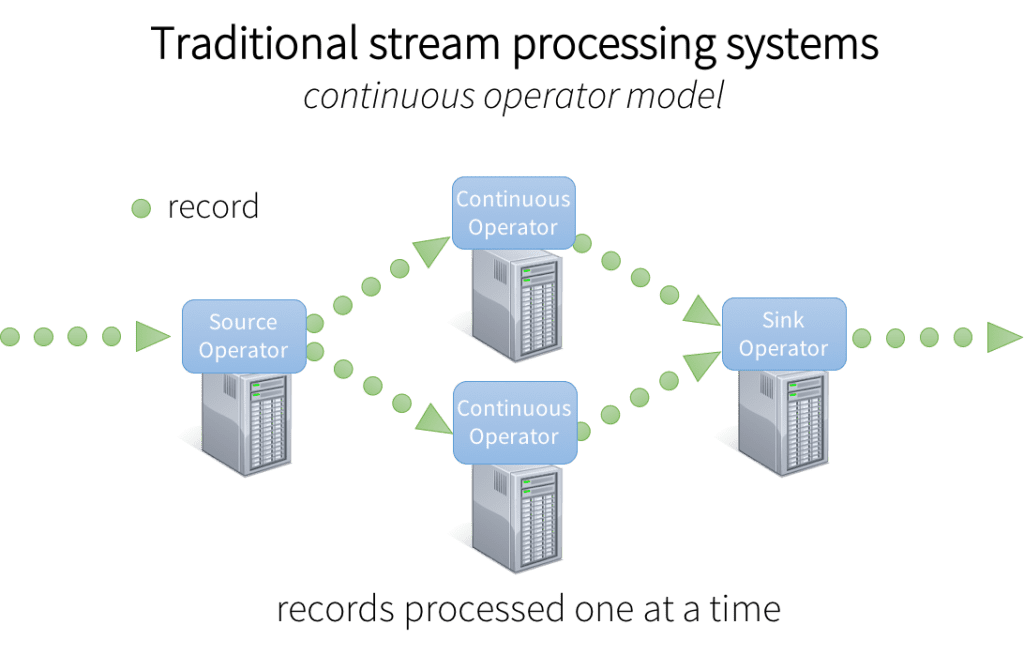

**Source**: https://databricks.com/blog/2015/07/30/diving-into-apache-spark-streamings-execution-model.html

However, consider how a Twitter feed about a particular hashtag behaves. It can be relatively quiet at some times, and frenetic at others. It's what we call **bursty** &mdash; the data can arrive in bursts. Building processing infrastructure big enough to handle the busiest periods is not cost-effective. We need some way to cache the arriving data so it doesn't overwhelm the system receiving the data so we don't drop any of it. In most applications a little latency is acceptable, so we're okay with the processing catching up to real-time only when the burst ends. To add this caching, we typically put a queuing system such as Kafka in between the source and the processing engine (for our purposes, Spark). More about Kafka and similar stream queues later.

The one-at-a-time model is also not optimum for the processing engine. At one end of the spectrum we have batch processing, which is efficient in its use of resources but not real-time. At the other end is one-at-a-time, which has the lowest latency, but it is not well-suited to distributing work over a cluster of servers. It's fine if the processing all takes place on a single server, but the overhead of coordinating the work of many machines eliminates the advantage of having many machines to share the work. Spark adopted an approach that is in the sweet spot between the two models when it comes to distributed computing.

Spark processes streaming data in **micro-batches**. It trades off some latency in return for enabling the big data throughput that a cluster is intended to provide. For most business applications, latency in seconds (vs. milliseconds for one-at-a-time) isn't an issue. The data may already have taken seconds just to arrive from its source.

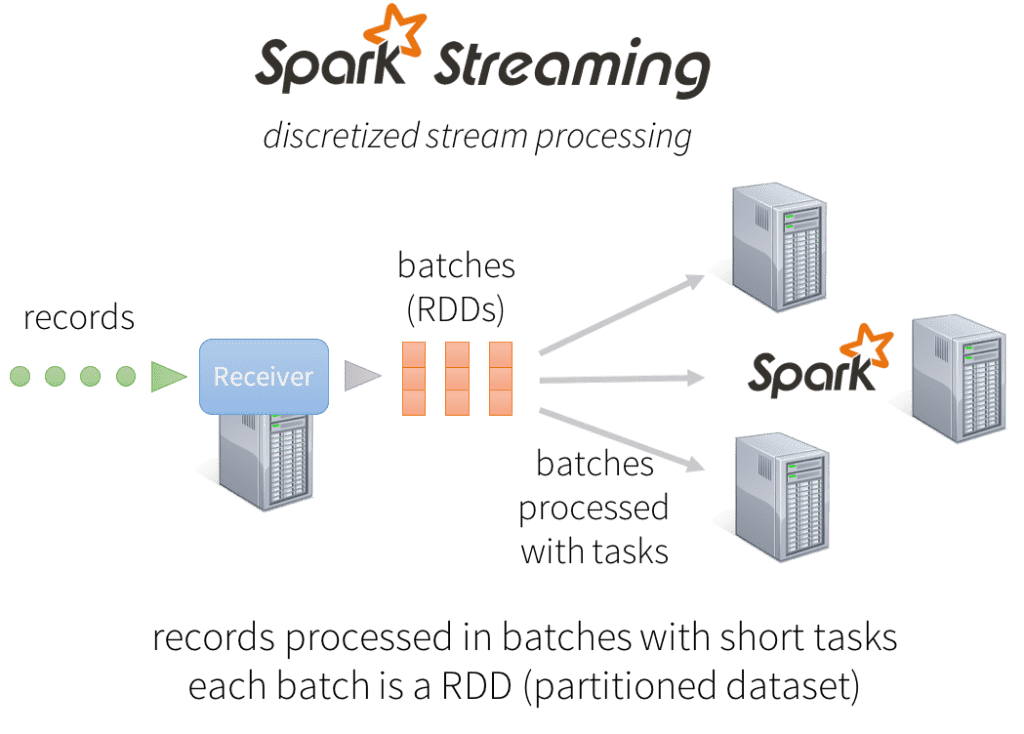

**Source**: https://databricks.com/blog/2015/07/30/diving-into-apache-spark-streamings-execution-model.html

## How does Spark Streaming model streaming data?

There were two key design objectives for Spark Streaming when it was conceived.  Spark Streaming now provides:

1. **A common programming model for batch and stream processing**. Spark Streaming uses the same API (to the extent possible) for working with streaming data as it does for working with fixed-size DataFrames.<br><br>

2. **A more general abstraction for stream processing**. Spark Streaming adopted a model for streams that encompasses processing everything in the data spectrum from static to periodic to non-stop real-time.

The key abstraction that Spark Streaming uses is to extend the familiar concept of a table to one which is potentially unbounded (i.e. continually being appended to). Data scientists are comfortable working with tables so this is a natural abstraction.

The question then becomes: How often do updates occur? Perhaps we want something in between updating our dashboard real-time and once a day. To provide this kind of generality, Spark Streaming introduced the idea of a **triggering  policy**. Developers specify triggering policies that will determine when Spark updates the results, either with a particular periodicity, or when an event occurs such as the arrival of enough new records to form a mini-batch (which is what we would want for real-time processing).

Specifying transformations is done in the same way as for non-streaming DataFrames, using the DataFrames' built-in methods (i.e. its API) or Spark SQL. Most of the operations available for fixed-size tables are available, but a few that can't be computed with acceptable performance are not.

The resulting output can be written to any kind of filesystem or database Spark knows how to write to. Spark Streaming will, if possible, perform the processing incrementally so it minimizes having to pass over the entire input table. To control its output behaviour, Spark Streaming provides three modes for writing out the results of an update. Conceptually, Spark Streaming produces a new output table when a trigger occurs. This table isn't actually outputted (or even materialized) unless the "complete mode" option of the three options below is chosen: 

1. **Append mode**: Only new rows appended to the output table since the last trigger are actually outputted. This is an appropriate mode when data computed in prior updates are considered immutable. It avoids moving around data that hasn't changed, which is always a good thing when the data is big.<br><br>

2. **Update mode**: Only the rows in the output table that changed are actually outputted. These output rows would typically then be used to do in-place updates in a relational table.<br><br>

3. **Complete mode**: The entire updated output table is actually outputted. This may be appropriate if the output table is small or will mostly change on every update.

## Exercise 2

Let's look at an example that compares using Structured Streaming to running a query on a fixed-size table. Use the following notebook: 

- https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2799933550853697/490651759058058/2202577924924539/latest.html


# Machine Learning with Spark

MLlib is Spark’s collection of machine learning (ML) library tools. These can be classified as:

- **ML Algorithms**: Common learning algorithms such as classification, regression, clustering, and collaborative filtering.


- **Featurization**: Feature extraction, transformation, dimensionality reduction, and selection.


- **Pipelines**: Tools for constructing, evaluating, and tuning ML pipelines.


- **Persistence**: Tools for saving and loading algorithms, models, and/or pipelines.


- **Utilities**: Tools for linear algebra, statistics, data handling, etc.

Detailed descriptions for each of these tools are available here: https://spark.apache.org/docs/latest/ml-guide.html.

## Why do we need a Pipeline?

Running a machine learning algorithm usually involves several additional steps to prepare the data and assess the results. Before entering the ML model we may need to:

- Extract the data from a datastore
- Take a sample from a larger dataset
- Clean the data
- Divide the data into training and hold-out sets
- Select features
- Perform rescaling
- Perform dimensionality reduction

After the machine learning step we may need to:

- Evaluate the model's performance on a test set
- Store the results
- Use the results to feed a dashboard or downstream processes

Pipelining provides a mechanism to string these steps together into an entire process (also known as a **workflow**), so they can be run as a unit with the output of one stage feeding into the next.


## ML Pipelines

**ML Pipelines** is MLlib's high-level API for creating pipelines, similar to scikit-learn's.

A pipeline consists of either a sequence of stages, called a **linear pipeline**, or a directed acyclic graph of stages if there are stages that can operate in parallel. There are two basic types of pipeline stages: `Transformer` and `Estimator`. 

- A **`Transformer`** takes a Spark `DataFrame` as input and produces an altered `DataFrame` as output. For example, a tokenizer is a `Transformer` that transforms a `DataFrame` with text into an `DataFrame` with tokenized words.


- An **`Estimator`** is an algorithm which has a `fit` method, usually a machine learning model. When given an appropriate `DataFrame` as input it can create a model. The model is actually a new `Transformer` (the model takes input examples and produces predictions, a transformation). For example, logistic regression is an `Estimator` that trains on a `DataFrame` with labels and features and produces a logistic regression model which can then be used as a `Transformer`.

An example of a pipeline showing the steps often required for supervised machine learning is below:


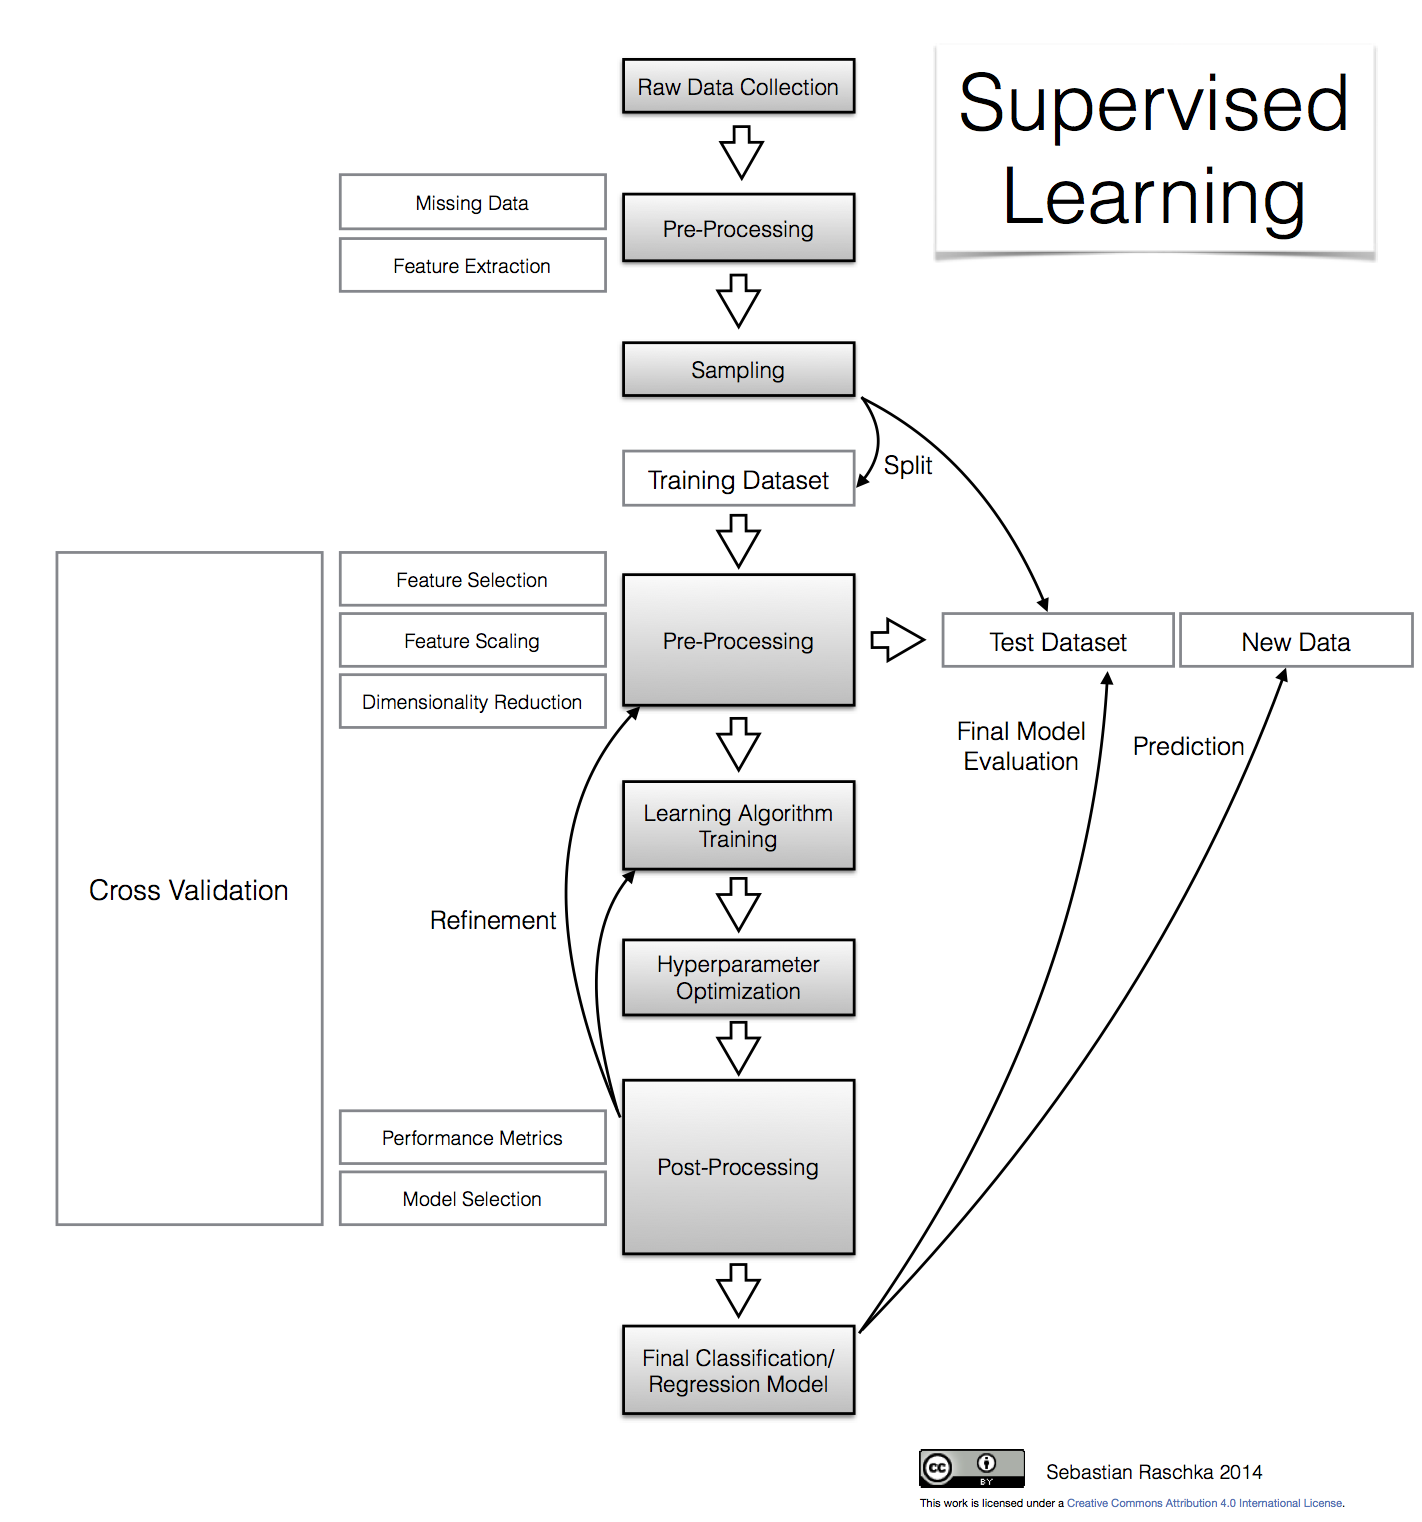

**Source**: http://sebastianraschka.com/Articles/2014_intro_supervised_learning.html

Coding a pipeline is super-easy. You simply create a new `Pipeline` object, passing it an array of stages (`Transformer`s and `Estimator`s). For example, in Python:

    stage1 = *a Transformer*

    stage2 = *a Transformer*

    stage3 = *an Estimator*

    pipeline = Pipeline(stages=[stage1, stage2, stage3])

To see some more examples of how to code pipelines check out: https://spark.apache.org/docs/latest/ml-pipeline.html#code-examples

### MLlib

MLlib standardizes Spark's APIs for machine learning algorithms to make it easier to combine multiple algorithms into a single pipeline. MLlib works similarly to scikit-learn.


### Exercise 3

Let's run an exercise involving MLlib libraries. The notebook for this exercise needs to be imported into your Databricks environment. It is the same notebook where we've been analyzing datasets using Spark SQL in the previous section. We will continue with the same example. Please refer to command cells 65-82 where we will use MLlib and carry out regression.

- https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/5915990090493625/2324680169011732/6085673883631125/latest.html

**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, you may proceed to the next module.

# References

* Stream code examples (n.d.): https://github.com/apache/spark/tree/v2.4.0/examples/src/main/python/streaming


* Structured Streaming Programming Guide (n.d.): https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html


* Spark Streaming Guide (n.d.): https://spark.apache.org/docs/latest/streaming-programming-guide.html


* Kleppmann, M. (2017). Chapter 11: Stream Processing in *Designing Data-Intensive Applications*. https://www.oreilly.com/library/view/designing-data-intensive-applications/9781491903063/.